
# Recommender Systems with Python


In this notebook we will develop basic recommendation systems using Python and pandas.

We will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies.

## Import Libraries

In [3]:
import numpy as np
import pandas as pd

## Get the Data

In [4]:
columns_names = ["user_id", "item_id", "rating", "timestamp"]

In [5]:
df = pd.read_csv('u.data',sep='\t', names=columns_names)

In [6]:
df.head(2)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949


Now let's get the movie titles:

In [8]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [9]:
movie_titles.head(3)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)


We can merge them together:

In [10]:
df = pd.merge(df,movie_titles,on='item_id')

In [11]:
df[:3]

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)


# EDA

Let's explore the data a bit and get a look at some of the best rated movies.

## Visualization Imports

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

%matplotlib inline

Let's create a ratings dataframe with average rating and number of ratings:

In [35]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [16]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [20]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head(3)

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257


Now set the number of ratings column:

In [88]:
ratings['no_of_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

ratings.head(3)

,rating,no_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109


Now a few histograms:

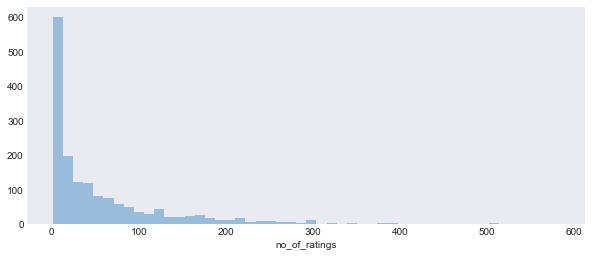

In [45]:
# ratings['no_of_ratings'].hist(bins=50)
plt.figure(figsize=(10,4))
sns.distplot(ratings['no_of_ratings'],bins=50,kde=False)

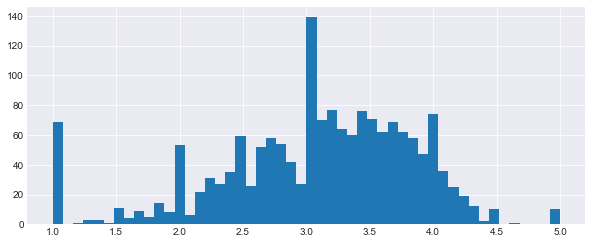

In [46]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=50)

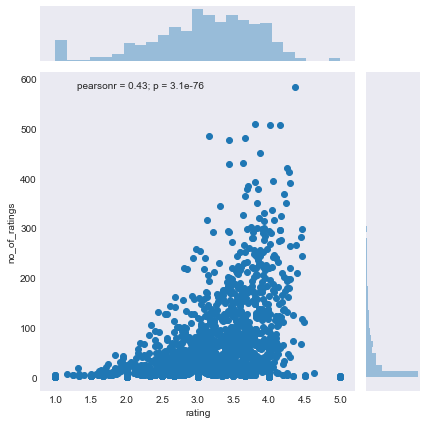

In [47]:
plt.figure(figsize=(10,4))
sns.jointplot(x='rating', y='no_of_ratings',data=ratings)

Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

## Recommending Similar Movies

Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [42]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')

In [44]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most rated movie:

In [49]:
ratings.sort_values('no_of_ratings',ascending=False).head()

,rating,no_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.

In [81]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

Now let's grab the user ratings for those two movies:

In [82]:
print(starwars_user_ratings.head(2))
print(liar_liar_user_ratings.head(2))

user_id
0    5.0
1    5.0
Name: Star Wars (1977), dtype: float64
user_id
0   NaN
1   NaN
Name: Liar Liar (1997), dtype: float64


We can then use corrwith() method to get correlations between two pandas series:

In [83]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

/Users/4bic/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/4bic/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [84]:
similar_to_liarliar = moviemat.corrwith(liar_liar_user_ratings)

/Users/4bic/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/4bic/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


Let's clean this by removing NaN values and using a DataFrame instead of a series:

In [86]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie). 

In [87]:
corr_starwars.sort_values('Correlation',ascending=False).head(3)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [90]:
corr_starwars = corr_starwars.join(ratings['no_of_ratings'])

corr_starwars.head(3)

,Correlation,no_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109


Now sort the values and notice how the titles make a lot more sense:

In [91]:
corr_starwars[corr_starwars['no_of_ratings']>100].sort_values('Correlation',
                                                             ascending=False).head()

,Correlation,no_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


Now the same for the comedy Liar Liar:


- clean this by removing NaN values

In [92]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar.head()

,Correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739


- filter out movies that have less than 100 reviews 

In [94]:
corr_liarliar = corr_liarliar.join(ratings['no_of_ratings'])

In [95]:
corr_liarliar[corr_liarliar['no_of_ratings']>100].sort_values('Correlation',
                                                             ascending=False).head()

,Correlation,no_of_ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
